In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.metrics import mean_squared_error,categorical_accuracy

In [2]:
trainn = pd.read_csv("../input/digit-recognizer/train.csv")
testt = pd.read_csv("../input/digit-recognizer/test.csv")
#sample = pd.read_csv("../input/digit-recognizer/sample_submission.csv")

In [3]:
train = trainn.iloc[:,1:]
train_df = train.values
train = train_df.reshape(len(train),28,28,1)

test_df = testt.values
test = test_df.reshape(len(test_df),28,28,1)

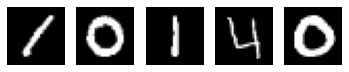

In [4]:
for i in np.arange(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train[i],cmap="gray")
    plt.axis("off")

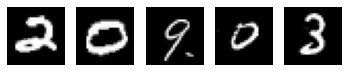

In [5]:
for i in np.arange(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test[i],cmap="gray")
    plt.axis("off")

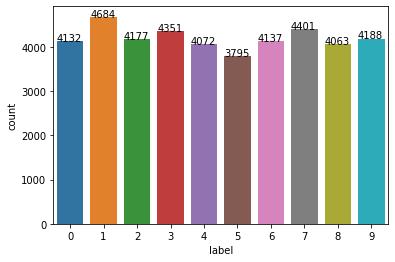

In [6]:
from warnings import filterwarnings as fw
fw("ignore")
sbn.countplot(trainn["label"])
for i in np.arange(10):
    plt.annotate(text=str(trainn[trainn["label"]==i]["label"].count()),xy=(i-0.4,trainn[trainn["label"]==i]["label"].count()));

In [7]:
def countplots(data):
    fw("ignore")
    try:
        sbn.countplot(data["label"])
    except KeyError:
        print("label not found in available dataset")
        
    for i in np.arange(10):
        plt.annotate(text=str(data[data["label"]==i]["label"].count()),xy=(i-0.4,data[data["label"]==i]["label"].count()));

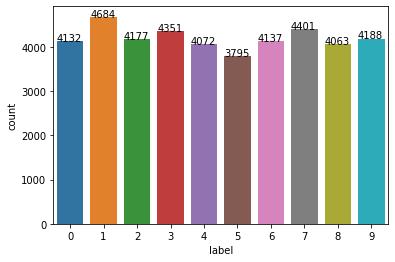

In [8]:
countplots(trainn)

In [9]:
trainn = pd.read_csv("../input/digit-recognizer/train.csv")
testt = pd.read_csv("../input/digit-recognizer/test.csv")
train = trainn.values
test = testt.values
np.random.shuffle(train)
np.random.shuffle(test)
x = train[:,1:].reshape(len(train),28,28,1)/255.0
y = train[:,0].astype(np.int32)
y = tf.keras.utils.to_categorical(y,num_classes=len(set(y)))

In [10]:
x_train = x[:int(len(x)*(3/4))]
y_train = y[:int(len(x)*(3/4))]
x_test = x[int(len(x)*(3/4)):]
y_test = y[int(len(x)*(3/4)):]

# CNN

In [42]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from tensorflow.keras.regularizers import L1L2,L2

In [12]:
y_test.shape

(10500, 10)

In [43]:
model = Sequential()
model.add(Conv2D(12,(1,1),activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(12,(1,1),activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(12,(1,1),activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(400,activation="relu"))
model.add(Dense(300,activation="relu",kernel_regularizer=L1L2(l1=0.001,l2=0.0001)))
model.add(Dense(500,activation="relu",kernel_regularizer=L2(l2=0.00001)))
model.add(Dense(350,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer=RMSprop(learning_rate=0.002),metrics=["accuracy"])
hist = model.fit(x=x_train,y=y_train,batch_size=500,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
63/63 [==============================] - 5s 57ms/step - loss: 3.2864 - accuracy: 0.2323 - val_loss: 2.0831 - val_accuracy: 0.3208
Epoch 2/100
63/63 [==============================] - 4s 57ms/step - loss: 2.0144 - accuracy: 0.3416 - val_loss: 1.9936 - val_accuracy: 0.3349
Epoch 3/100
63/63 [==============================] - 3s 52ms/step - loss: 1.8662 - accuracy: 0.3812 - val_loss: 1.8124 - val_accuracy: 0.4004
Epoch 4/100
63/63 [==============================] - 3s 52ms/step - loss: 1.7112 - accuracy: 0.4409 - val_loss: 1.7463 - val_accuracy: 0.4331
Epoch 5/100
63/63 [==============================] - 3s 54ms/step - loss: 1.5837 - accuracy: 0.4958 - val_loss: 1.5472 - val_accuracy: 0.5070
Epoch 6/100
63/63 [==============================] - 3s 53ms/step - loss: 1.4845 - accuracy: 0.5423 - val_loss: 1.5056 - val_accuracy: 0.5425
Epoch 7/100
63/63 [==============================] - 3s 52ms/step - loss: 1.3888 - accuracy: 0.5860 - val_loss: 1.5860 - val_accuracy: 0.5351
Epoch 

In [44]:
model.layers

In [45]:
x_train.shape

(31500, 28, 28, 1)

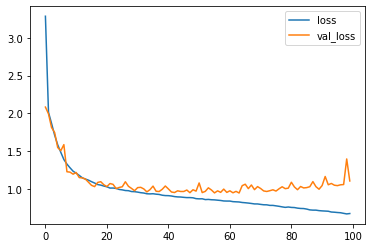

In [46]:
for i in ["loss","val_loss"]:
    plt.plot(hist.history[i],label=i);
    plt.legend()

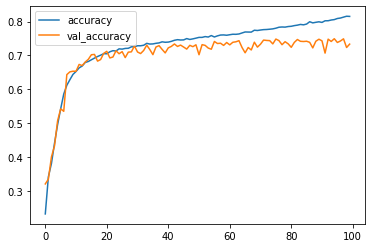

In [47]:
for i in ["accuracy","val_accuracy"]:
    plt.plot(hist.history[i],label=i);
    plt.legend()